In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import requests
from scipy import stats

In [2]:
target_url = 'http://users.stat.ufl.edu/~winner/data/airq402.dat'
response = requests.get(target_url)
data_dat = response.text
data_list = data_dat.splitlines() 
data_content = [e.split() for e in data_list]
#print(data_content)
#Column names for the data are:
cols = ['orig_city', 'Dest_city','Average_Fare_least','Distance', 'Average_weekly_passengers','market_leading_airline',
'market_share_highest','Average_fare_leading','Low_price_airline','market_share_lowest','price']

In [3]:
df = pd.DataFrame(data_content, columns = cols)

In [4]:
df

,orig_city,Dest_city,Average_Fare_least,Distance,Average_weekly_passengers,market_leading_airline,market_share_highest,Average_fare_leading,Low_price_airline,market_share_lowest,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
...,...,...,...,...,...,...,...,...,...,...,...
995,SYR,TPA,136.16,1104,184.34,US,33.37,135.82,DL,28.65,118.51
996,TLH,TPA,83.28,200,232.71,FL,99.57,82.55,FL,99.57,82.55
997,TPA,IAD,159.97,814,843.80,US,46.19,159.65,DL,13.89,159.02
998,TPA,PBI,73.57,174,214.45,WN,99.74,73.44,WN,99.74,73.44


In [5]:
#dropping all the categorical columns
df1 = df.drop(columns = ['orig_city', 'Dest_city', 'market_leading_airline', 'Low_price_airline'])

In [6]:
df1['Average_Fare_least'] = df1['Average_Fare_least'].astype('float')
df1['Distance']=df1['Distance'].astype('int')
df1['Average_weekly_passengers'] = df1['Average_weekly_passengers'].astype('float')
df1['market_share_highest'] = df1['market_share_highest'].astype('float')
df1['Average_fare_leading'] = df1['Average_fare_leading'].astype('float')
df1['market_share_lowest'] = df1['market_share_lowest'].astype('float')
df1['price'] = df1['price'].astype('float')

In [7]:
#converting features into integers
df1['Average_Fare_least'] = df1['Average_Fare_least'].astype('int')
df1['Average_weekly_passengers'] = df1['Average_weekly_passengers'].astype('int')
df1['market_share_highest'] = df1['market_share_highest'].astype('int')
df1['Average_fare_leading'] = df1['Average_fare_leading'].astype('int')
df1['market_share_lowest'] = df1['market_share_lowest'].astype('int')
df1['price'] = df1['price'].astype('int')

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
Average_Fare_least           1000 non-null int32
Distance                     1000 non-null int32
Average_weekly_passengers    1000 non-null int32
market_share_highest         1000 non-null int32
Average_fare_leading         1000 non-null int32
market_share_lowest          1000 non-null int32
price                        1000 non-null int32
dtypes: int32(7)
memory usage: 27.5 KB


In [9]:
#quantile 1 of dataset
q1=df1.quantile(0.25)
q1

Average_Fare_least           125.00
Distance                     553.50
Average_weekly_passengers    256.75
market_share_highest          46.00
Average_fare_leading         124.00
market_share_lowest           13.00
price                        113.00
Name: 0.25, dtype: float64

In [10]:
#quantile 3 of dataset
q3=df1.quantile(0.75)
q3

Average_Fare_least            197.00
Distance                     1452.50
Average_weekly_passengers     769.25
market_share_highest           73.00
Average_fare_leading          202.25
market_share_lowest            52.00
price                         168.00
Name: 0.75, dtype: float64

In [11]:
#IQR of dataset
IQR=q3-q1
IQR

Average_Fare_least            72.00
Distance                     899.00
Average_weekly_passengers    512.50
market_share_highest          27.00
Average_fare_leading          78.25
market_share_lowest           39.00
price                         55.00
dtype: float64

In [20]:
#eliminating outliers
df = df1[~((df1 < (q1 - 1.5 * IQR)) |(df1 > (q3 + 1.5 * IQR))).any(axis=1)]

In [21]:
#cleaned dataset
df

,Average_Fare_least,Distance,Average_weekly_passengers,market_share_highest,Average_fare_leading,market_share_lowest,price
0,114,528,424,70,111,70,111
1,122,860,276,75,123,17,118
2,214,852,215,78,223,2,167
3,69,288,606,96,68,96,68
4,158,723,313,39,161,15,145
...,...,...,...,...,...,...,...
995,136,1104,184,33,135,28,118
996,83,200,232,99,82,99,82
997,159,814,843,46,159,13,159
998,73,174,214,99,73,99,73


In [22]:
#correlation matrix 
df.corr()

,Average_Fare_least,Distance,Average_weekly_passengers,market_share_highest,Average_fare_leading,market_share_lowest,price
Average_Fare_least,1.000000,0.522609,-0.197014,-0.207874,0.979620,-0.494021,0.840969
Distance,0.522609,1.000000,-0.129640,-0.547132,0.489541,-0.361448,0.539772
Average_weekly_passengers,-0.197014,-0.129640,1.000000,0.022685,-0.163634,0.076881,-0.208752
market_share_highest,-0.207874,-0.547132,0.022685,1.000000,-0.193264,0.280838,-0.314804
Average_fare_leading,0.979620,0.489541,-0.163634,-0.193264,1.000000,-0.519736,0.794175
market_share_lowest,-0.494021,-0.361448,0.076881,0.280838,-0.519736,1.000000,-0.261183
price,0.840969,0.539772,-0.208752,-0.314804,0.794175,-0.261183,1.000000


In [15]:
#Assigning dependent and independent variables
y,x=df['Average_Fare_least'],df['Average_fare_leading']

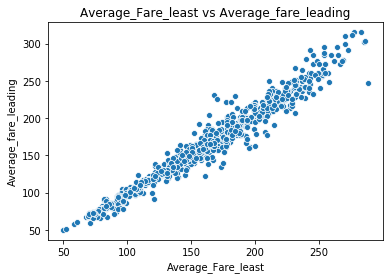

In [16]:
sns.scatterplot(y,x)
plt.title('Average_Fare_least vs Average_fare_leading')
plt.show()

In [17]:
#Train test split
x=df.drop('Average_Fare_least',axis=1)

In [18]:
#independent variables
x

,Distance,Average_weekly_passengers,market_share_highest,Average_fare_leading,market_share_lowest,price
0,528,424,70,111,70,111
1,860,276,75,123,17,118
2,852,215,78,223,2,167
3,288,606,96,68,96,68
4,723,313,39,161,15,145
...,...,...,...,...,...,...
995,1104,184,33,135,28,118
996,200,232,99,82,99,82
997,814,843,46,159,13,159
998,174,214,99,73,99,73


In [19]:
#dependent variable
y

0      114
1      122
2      214
3       69
4      158
      ... 
995    136
996     83
997    159
998     73
999    126
Name: Average_Fare_least, Length: 885, dtype: int32